# Machine Learning Assigment 2

# PROBLEM STATEMENT for ANN:
Dataset Link - advertising.csv    
In this assignment you will be working with a dummy advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. you will try to create a model that will predict whether or not they will click on an ad based on the features of that user.
This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad
For the dataset (Advertising dataset), implement the ANN classifier using Keras in Python. [5M]
Dataset: Advertising Dataset.csv
The marks distribution are as follows:
1.	Import the libraries and Load the dataset and Remove/replace missing values (if any) [1M]
2.	Split features and labels [0.5M]
3.	Split train and test data [0.5M]
4.	Implement ANN Classifier using Keras [2M]
5.	Calculate accuracy measures [1M]

Justify model.


<h3> Question 1: Import required libraries

In [19]:
# import required python modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

<h3> Read dataset

In [20]:
#import dataset
df = pd.read_csv('advertising_1.csv')
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
df.shape

(1000, 10)

<h3> Outlier and Null data detection

In [22]:
# describe the dataset
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [23]:
# check the null values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

<h5> There was no null data and oulier in dataset

<h4> 1 hot encoding of categorical data

In [24]:
# implement 1 hot encoding
df['Ad Topic Line'].value_counts()

Grass-roots systematic hardware             1
Customer-focused full-range neural-net      1
Team-oriented executive core                1
Compatible intangible customer loyalty      1
Balanced uniform algorithm                  1
                                           ..
User-centric solution-oriented emulation    1
Realigned scalable standardization          1
Phased transitional instruction set         1
Future-proofed responsive matrix            1
Balanced motivating help-desk               1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [25]:
#Drop 'Ad Topic Line'
df=df.drop( columns='Ad Topic Line')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [26]:
#  1 hot encoding, 'City'
df['City'].value_counts()

Williamsport           3
Lisamouth              3
Port Julie             2
Millertown             2
Wrightburgh            2
                      ..
North Aaronchester     1
Joshuaburgh            1
West Zacharyborough    1
Rogerburgh             1
Kingchester            1
Name: City, Length: 969, dtype: int64

In [27]:
#Drop 'City'
df=df.drop( columns='City')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [28]:
#  1 hot encoding, 'Country'
df['Country'].value_counts()

Czech Republic                                         9
France                                                 9
Cyprus                                                 8
Micronesia                                             8
Senegal                                                8
                                                      ..
British Indian Ocean Territory (Chagos Archipelago)    1
Aruba                                                  1
Kiribati                                               1
Germany                                                1
Montserrat                                             1
Name: Country, Length: 237, dtype: int64

In [29]:
# Drop 'Country'
df=df.drop( columns='Country')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


In [30]:
#  1 hot encoding, 'Timestamp'
df['Timestamp'].value_counts()

2016-06-28 12:51:02    1
2016-03-14 23:13:11    1
2016-05-05 11:09:29    1
2016-01-06 21:43:22    1
2016-06-08 20:13:27    1
                      ..
2016-01-23 13:14:18    1
2016-04-16 10:36:49    1
2016-06-12 21:21:53    1
2016-05-31 17:50:15    1
2016-02-14 06:51:43    1
Name: Timestamp, Length: 1000, dtype: int64

In [31]:
#Drop 'Timestamp'
df=df.drop( columns='Timestamp')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## 1 Hot Encoding
### We tried to "1 Hot Encoding" 3 attribute which were not numeric asumming catgorical
#### 'Ad Topic Line'
##### 1000 rows has 1000 unique values, not possibel to "1 hot encoding" so drping the  'Ad Topic Line' attribure
#### 'City'
##### 1000 rows has 969 unique values, not possibel to "1 hot encoding" so drping the 'City' attribute
#### 'Country'
##### 1000 rows has 237 unique values, not possibel to "1 hot encoding" so drping the 'Country' attribute

<h3> Question 2: Split features and label

In [32]:
#Changing pandas dataframe to numpy array
X = df.iloc[:,:5].values
y = df.iloc[:,-1].values

<h3> Question 3: Split into training and testing data

In [33]:
#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

<h3> Question 4: Implement ANN Classifier using Keras

In [35]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
15/15 [==============================] - 1s 855us/step - loss: 0.0000e+00 - accuracy: 0.5764
Epoch 2/100
15/15 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.4998
Epoch 3/100
15/15 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.4822
Epoch 4/100
15/15 [==============================] - 0s 712us/step - loss: 0.0000e+00 - accuracy: 0.5031
Epoch 5/100
15/15 [==============================] - 0s 786us/step - loss: 0.0000e+00 - accuracy: 0.5077
Epoch 6/100
15/15 [==============================] - 0s 784us/step - loss: 0.0000e+00 - accuracy: 0.4862
Epoch 7/100
15/15 [==============================] - 0s 855us/step - loss: 0.0000e+00 - accuracy: 0.5050
Epoch 8/100
15/15 [==============================] - 0s 876us/step - loss: 0.0000e+00 - accuracy: 0.5030
Epoch 9/100
15/15 [==============================] - 0s 784us/step - loss: 0.0000e+00 - accuracy: 0.4865
Epoch 10/100
15/15 [==============================] - 0

In [38]:
y_pred = model.predict(X_test)
# Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
# Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

<h3> Question 5: Calculate the accuracy measures

In [39]:
a = accuracy_score(pred,test)
print('Accuracy:', a*100)

Accuracy: 100.0


In [40]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.5300
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.5300
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.5300
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.5300
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.5300
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4967 - val_loss: 0.0000e+00 - val_accuracy: 0.5300
Epoch 7/100
15/15 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.59 - 0s 3ms

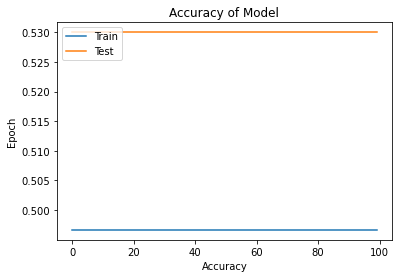

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

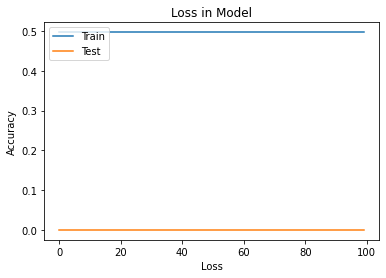

In [47]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['loss']) 
plt.title('Loss in Model') 
plt.ylabel('Accuracy') 
plt.xlabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()